In [1]:
import sys
!{sys.executable} -m pip install kagglehub



You should consider upgrading via the 'c:\Users\pc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import kagglehub
import os

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, "TMDB_movie_dataset_v11.csv"))

Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\asaniczka\tmdb-movies-dataset-2023-930k-movies\versions\590


In [4]:

print("Rozmiar zbioru:", df.shape)

missing = df.isnull().sum()
print("Braki danych:\n", missing[missing > 0])

print("Typy danych:\n", df.dtypes)

Rozmiar zbioru: (1234214, 24)
Braki danych:
 title                        13
release_date             229926
backdrop_path            914444
homepage                1105009
imdb_id                  608869
original_title               13
overview                 263078
poster_path              408001
tagline                 1060935
genres                   513933
production_companies     689077
production_countries     567668
spoken_languages         545597
keywords                 911892
dtype: int64
Typy danych:
 id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object


In [5]:
desc = df.describe(include='all').transpose()
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1234214.0,NaN,NaN,NaN,796052.663856,424442.751667,2.0,440146.25,805078.5,1175765.75,1491448.0
title,1234201,1054690,Home,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,1234214.0,NaN,NaN,NaN,1.751517,2.962085,0.0,0.0,0.0,4.0,10.0
vote_count,1234214.0,NaN,NaN,NaN,17.381119,305.703033,0.0,0.0,0.0,1.0,34495.0
status,1234214,6,Released,1200331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1004288,43096,2006-01-01,3776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1234214.0,NaN,NaN,NaN,664489.903402,18311789.738809,-12.0,0.0,0.0,0.0,4999999999.0
runtime,1234214.0,NaN,NaN,NaN,46.354683,61.401759,-28.0,0.0,20.0,87.0,14400.0
adult,1234214,2,False,1114547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backdrop_path,319770,317114,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grouped = df.groupby("status")[["revenue", "budget"]].mean().sort_values("budget", ascending=False)
grouped


,revenue,budget
status,,
Canceled,6.289308e-01,547586.578616
Planned,9.307029e+00,412995.839420
In Production,2.285486e+05,328838.361628
Post Production,2.958729e+05,324739.472626
Released,6.771199e+05,255613.593051
Rumored,2.118988e+06,189352.341102


Największy budżet mają filmy w statusie Cancelled i można zauważyć, że wraz ze wzrostem średniego budżetu średnie revenue maleje

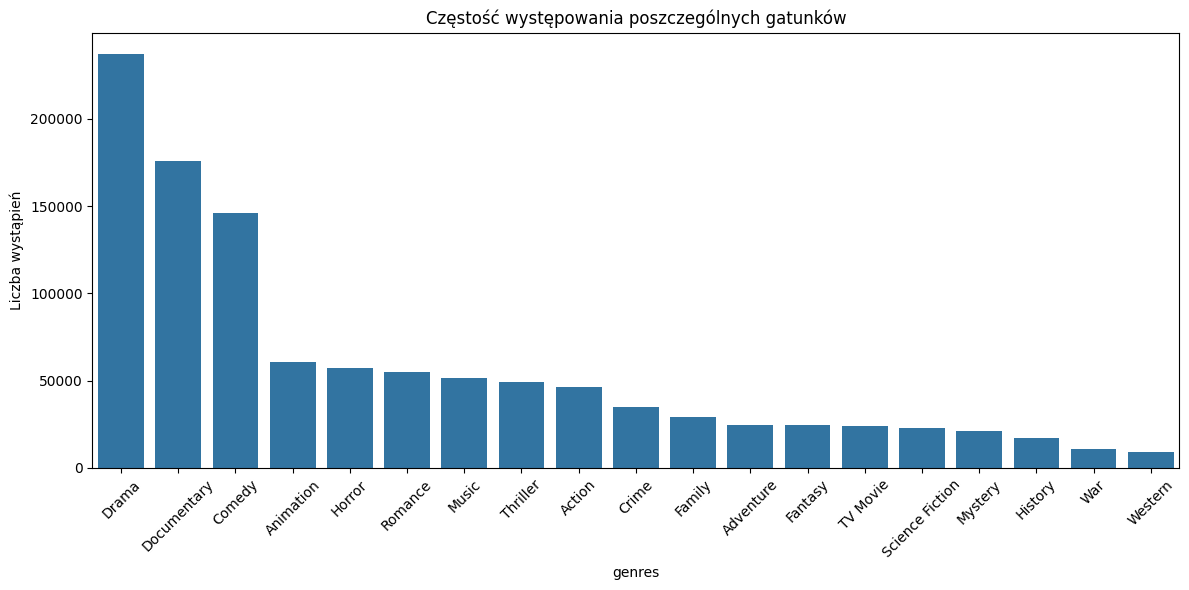

In [7]:

df["genres"] = df["genres"].fillna('none')

all_genres = (
    df["genres"]
    .str.split(',')
    .explode()
    .str.strip()
    .loc[lambda x: (x != '') & (x != 'none')]  
)

genre_counts = all_genres.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_counts.index, 
    y=genre_counts.values,
    order=genre_counts.sort_values(ascending=False).index
)
plt.title('Częstość występowania poszczególnych gatunków')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

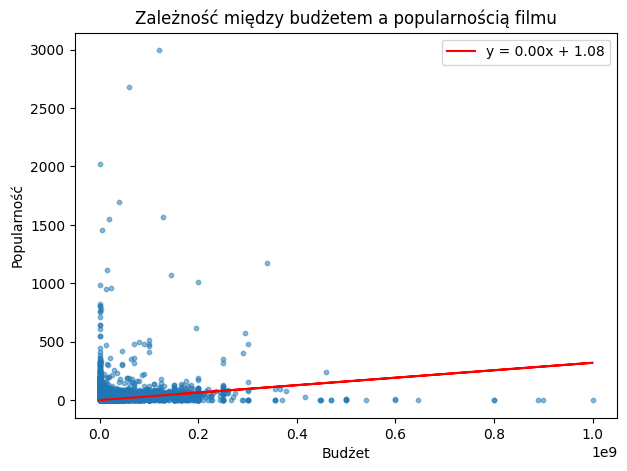

In [10]:
a, b = np.polyfit(df['budget'], df['popularity'], 1)

plt.figure(figsize=(7, 5))
plt.scatter(df['budget'], df['popularity'], alpha=0.5, s=10)
plt.plot(df['budget'], a * df['budget'] + b, color='red', label=f'y = {a:.2f}x + {b:.2f}')
plt.title("Zależność między budżetem a popularnością filmu")
plt.xlabel("Budżet")
plt.ylabel("Popularność")
plt.legend()
plt.show()

Nie ma wyraźnej korelacji między budżetem a popularnością, co sugeruje, że wyższy budżet nie gwarantuje większej popularności.
Większość filmów ma budżet poniżej 0,4 (w jednostkach 1e9) i popularność poniżej 1500, co wskazuje na skupisko mniej kosztownych produkcji.
Istnieją wyjątki z wysoką popularnością (powyżej 2000) przy niskim budżecie, sugerując, że inne czynniki (np. jakość, marketing) mogą odgrywać kluczową rolę.

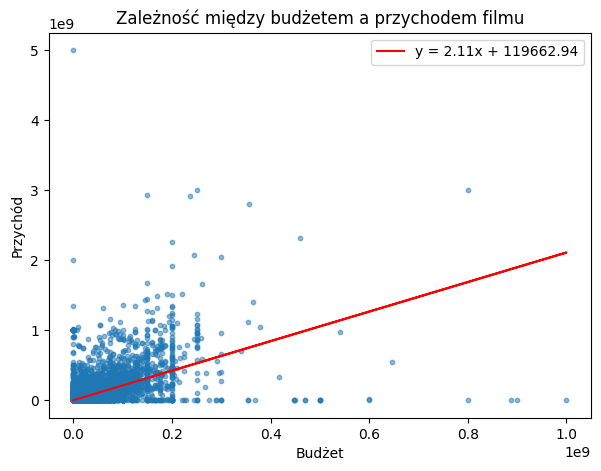

In [ ]:
a, b = np.polyfit(df['budget'], df['revenue'], 1)

plt.figure(figsize=(7, 5))
plt.scatter(df['budget'], df['revenue'], alpha=0.5, s=10)
plt.plot(df['budget'], a * df['budget'] + b, color='red', label=f'y = {a:.2f}x + {b:.2f}')
plt.title("Zależność między budżetem a przychodem filmu")
plt.xlabel("Budżet")
plt.ylabel("Przychód")
plt.legend()
plt.show()

Istnieje dodatnia korelacja między budżetem a przychodem, co wskazuje, że wyższy budżet zazwyczaj wiąże się z większym przychodem.
Większość filmów ma budżet poniżej 0,4 (w jednostkach 1e9) i przychód poniżej 2 (1e9), ale rozproszenie danych jest znaczne.
Niektóre filmy z niskim budżetem osiągają wysoki przychód (np. 5 w skali 1e9), co sugeruje, że efektywność produkcji może być kluczowa.